In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20, 5)

In [3]:
df = pd.read_csv("onion_prices_bangalore_2004_2024.csv")
df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Unnamed: 10
0,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,133.0,400,440,420,06 Sep 2006,NaN
1,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,230.0,200,400,300,18 Aug 2016,NaN
2,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,301.0,300,340,320,04 Oct 2006,NaN
3,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,342.0,800,1400,1100,29 Jun 2015,NaN
4,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,344.0,1200,2400,1700,10 Aug 2015,NaN


# EDA

In [4]:
df.shape

(12668, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12668 entries, 0 to 12667
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State Name                 12668 non-null  object 
 1   District Name              12668 non-null  object 
 2   Market Name                12668 non-null  object 
 3   Variety                    12668 non-null  object 
 4   Group                      12668 non-null  object 
 5   Arrivals (Tonnes)          12668 non-null  float64
 6   Min Price (Rs./Quintal)    12668 non-null  int64  
 7   Max Price (Rs./Quintal)    12668 non-null  int64  
 8   Modal Price (Rs./Quintal)  12668 non-null  object 
 9   Reported Date              12667 non-null  object 
 10  Unnamed: 10                0 non-null      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Arrivals (Tonnes),12668.0,492.541364,287.567975,0.0,244.0,488.0,744.0,1200.0
Min Price (Rs./Quintal),12668.0,1056.107515,884.339898,50.0,500.0,800.0,1400.0,13000.0
Max Price (Rs./Quintal),12668.0,1495.384670,1137.914226,200.0,800.0,1200.0,1800.0,22500.0
Unnamed: 10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["Reported Date"] = pd.to_datetime(df["Reported Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12668 entries, 0 to 12667
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 12668 non-null  object        
 1   District Name              12668 non-null  object        
 2   Market Name                12668 non-null  object        
 3   Variety                    12668 non-null  object        
 4   Group                      12668 non-null  object        
 5   Arrivals (Tonnes)          12668 non-null  float64       
 6   Min Price (Rs./Quintal)    12668 non-null  int64         
 7   Max Price (Rs./Quintal)    12668 non-null  int64         
 8   Modal Price (Rs./Quintal)  12668 non-null  object        
 9   Reported Date              12667 non-null  datetime64[ns]
 10  Unnamed: 10                0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage:

In [8]:
df["Reported Month"] = df["Reported Date"].dt.month
df["Reported Year"] = df["Reported Date"].dt.year
df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Unnamed: 10,Reported Month,Reported Year
0,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,133.0,400,440,420,2006-09-06,NaN,9.0,2006.0
1,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,230.0,200,400,300,2016-08-18,NaN,8.0,2016.0
2,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,301.0,300,340,320,2006-10-04,NaN,10.0,2006.0
3,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,342.0,800,1400,1100,2015-06-29,NaN,6.0,2015.0
4,Karnataka,Bangalore,Bangalore,Bangalore-Samall,Vegetables,344.0,1200,2400,1700,2015-08-10,NaN,8.0,2015.0


In [9]:
df.drop(columns = ["State Name", "District Name", "Market Name", "Group", "Modal Price (Rs./Quintal)", "Unnamed: 10"], inplace = True)
df.head()

,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Reported Date,Reported Month,Reported Year
0,Bangalore-Samall,133.0,400,440,2006-09-06,9.0,2006.0
1,Bangalore-Samall,230.0,200,400,2016-08-18,8.0,2016.0
2,Bangalore-Samall,301.0,300,340,2006-10-04,10.0,2006.0
3,Bangalore-Samall,342.0,800,1400,2015-06-29,6.0,2015.0
4,Bangalore-Samall,344.0,1200,2400,2015-08-10,8.0,2015.0


In [10]:
df.rename(columns = {
    "Variety": "variety",
    "Arrivals (Tonnes)": "arrival_quantity",
    "Min Price (Rs./Quintal)": "min_price",
    "Max Price (Rs./Quintal)": "max_price",
    "Modal Price (Rs./Quintal)": "modal_price",
    "Reported Date": "reported_date",
    "Reported Month": "reported_month",
    "Reported Year": "reported_year"
}, inplace = True)
df.head()

,variety,arrival_quantity,min_price,max_price,reported_date,reported_month,reported_year
0,Bangalore-Samall,133.0,400,440,2006-09-06,9.0,2006.0
1,Bangalore-Samall,230.0,200,400,2016-08-18,8.0,2016.0
2,Bangalore-Samall,301.0,300,340,2006-10-04,10.0,2006.0
3,Bangalore-Samall,342.0,800,1400,2015-06-29,6.0,2015.0
4,Bangalore-Samall,344.0,1200,2400,2015-08-10,8.0,2015.0


In [11]:
df["average_price"] = (df["min_price"] + df["max_price"])/ 2
df.head()

,variety,arrival_quantity,min_price,max_price,reported_date,reported_month,reported_year,average_price
0,Bangalore-Samall,133.0,400,440,2006-09-06,9.0,2006.0,420.0
1,Bangalore-Samall,230.0,200,400,2016-08-18,8.0,2016.0,300.0
2,Bangalore-Samall,301.0,300,340,2006-10-04,10.0,2006.0,320.0
3,Bangalore-Samall,342.0,800,1400,2015-06-29,6.0,2015.0,1100.0
4,Bangalore-Samall,344.0,1200,2400,2015-08-10,8.0,2015.0,1800.0


In [12]:
# unique varieties
print(df["variety"].unique())
print(df["variety"].nunique())

['Bangalore-Samall' 'Beelary-Red' 'Local' 'Onion' 'Puna']
5


In [13]:
# value counts of each onion variety
df["variety"].value_counts(ascending = False)

variety
Local               3562
Puna                3503
Bangalore-Samall    2741
Onion               2081
Beelary-Red          781
Name: count, dtype: int64

In [14]:
# average minimum price of each onion variety
df.groupby("variety")["min_price"].mean()

variety
Bangalore-Samall     518.491426
Beelary-Red          612.676056
Local               1154.031443
Onion               1166.768381
Puna                1410.328290
Name: min_price, dtype: float64

In [15]:
# average maximum price of each onion variety
df.groupby("variety")["max_price"].mean()

variety
Bangalore-Samall     856.784020
Beelary-Red          742.893726
Local               1544.504492
Onion               1614.935127
Puna                2041.873537
Name: max_price, dtype: float64

In [16]:
# year-wise highest count of onion variety
variety_counts_year = df.groupby(["variety", "reported_year"])["variety"].count()

print(variety_counts_year.to_string(max_rows = None))

variety           reported_year
Bangalore-Samall  2005.0            49
                  2006.0           190
                  2007.0           221
                  2008.0           146
                  2009.0           100
                  2010.0            69
                  2011.0           167
                  2012.0           274
                  2013.0           195
                  2014.0           181
                  2015.0           264
                  2016.0           267
                  2017.0            57
                  2018.0             1
                  2019.0             1
                  2020.0             1
                  2022.0           207
                  2023.0           235
                  2024.0           116
Beelary-Red       2004.0           218
                  2005.0           159
                  2007.0           117
                  2008.0           183
                  2009.0           104
Local             2009.0        

In [17]:
# month-wise highest count of onion variety
variety_counts_month = df.groupby(["variety", "reported_month"])["variety"].count()

print(variety_counts_month.to_string(max_rows = None))

variety           reported_month
Bangalore-Samall  1.0               241
                  2.0               227
                  3.0               267
                  4.0               219
                  5.0               233
                  6.0               286
                  7.0               283
                  8.0               240
                  9.0               215
                  10.0              174
                  11.0              163
                  12.0              193
Beelary-Red       1.0                66
                  2.0                67
                  3.0                74
                  4.0                68
                  5.0                59
                  6.0                76
                  7.0                76
                  8.0                87
                  9.0                57
                  10.0               55
                  11.0               53
                  12.0               43
Local  

In [18]:
# year-wise total quantity of onions purchased per variety
variety_quantity_year = df.groupby(["variety", "reported_year"])["arrival_quantity"].sum()

print(variety_quantity_year.to_string(max_rows = None))

variety           reported_year
Bangalore-Samall  2005.0            23829.0
                  2006.0            91263.0
                  2007.0           103351.0
                  2008.0            69591.0
                  2009.0            45566.0
                  2010.0            32893.0
                  2011.0            74129.0
                  2012.0           130689.0
                  2013.0            85999.0
                  2014.0            88551.0
                  2015.0           136695.0
                  2016.0           131943.0
                  2017.0            28048.0
                  2018.0              504.0
                  2019.0              268.0
                  2020.0              546.0
                  2022.0           101161.0
                  2023.0           115834.0
                  2024.0            63123.0
Beelary-Red       2004.0           110961.0
                  2005.0            73899.0
                  2007.0            55761.0


In [19]:
# month-wise total quantity of onions purchased per variety
variety_quantity_month = df.groupby(["variety", "reported_month"])["arrival_quantity"].sum()

print(variety_quantity_month.to_string(max_rows = None))

variety           reported_month
Bangalore-Samall  1.0               117477.0
                  2.0               113635.0
                  3.0               128056.0
                  4.0               105153.0
                  5.0               105168.0
                  6.0               144896.0
                  7.0               133871.0
                  8.0               120970.0
                  9.0               106962.0
                  10.0               73923.0
                  11.0               79762.0
                  12.0               94110.0
Beelary-Red       1.0                34937.0
                  2.0                30130.0
                  3.0                38324.0
                  4.0                30859.0
                  5.0                26511.0
                  6.0                37855.0
                  7.0                32369.0
                  8.0                44445.0
                  9.0                29924.0
                  10.0

In [20]:
# average price of each variety of onion per year
average_price_year = df.groupby(["variety", "reported_year"])["average_price"].mean()

print(average_price_year.to_string(max_rows = None))

variety           reported_year
Bangalore-Samall  2005.0            491.938776
                  2006.0            301.328947
                  2007.0            656.018100
                  2008.0            451.061644
                  2009.0            583.000000
                  2010.0            985.507246
                  2011.0            724.625749
                  2012.0            465.182482
                  2013.0           1097.076923
                  2014.0            817.679558
                  2015.0            928.503788
                  2016.0            288.932584
                  2017.0            413.596491
                  2018.0           2250.000000
                  2019.0            650.000000
                  2020.0            850.000000
                  2022.0            628.140097
                  2023.0           1055.531915
                  2024.0           1105.603448
Beelary-Red       2004.0            585.986239
                  2005.0    

In [21]:
# average price of each variety of onion per month
average_price_month = df.groupby(["variety", "reported_month"])["average_price"].mean()

print(average_price_month.to_string(max_rows = None))

variety           reported_month
Bangalore-Samall  1.0                647.095436
                  2.0                621.167401
                  3.0                511.058052
                  4.0                505.593607
                  5.0                493.315451
                  6.0                693.400350
                  7.0                901.519435
                  8.0                852.479167
                  9.0                767.755814
                  10.0               756.666667
                  11.0               765.889571
                  12.0               757.176166
Beelary-Red       1.0                778.409091
                  2.0                646.567164
                  3.0                528.040541
                  4.0                421.764706
                  5.0                445.932203
                  6.0                553.750000
                  7.0                750.789474
                  8.0                880.344828
       

In [22]:
# average maximum price of each variety of onion per year
average_maximum_price_year = df.groupby(["variety", "reported_year"])["max_price"].mean()

print(average_maximum_price_year.to_string(max_rows = None))

variety           reported_year
Bangalore-Samall  2005.0            585.918367
                  2006.0            331.078947
                  2007.0            727.873303
                  2008.0            516.095890
                  2009.0            647.500000
                  2010.0           1280.434783
                  2011.0            861.676647
                  2012.0            558.613139
                  2013.0           1310.051282
                  2014.0           1002.762431
                  2015.0           1260.795455
                  2016.0            455.617978
                  2017.0            577.192982
                  2018.0           2500.000000
                  2019.0            700.000000
                  2020.0            900.000000
                  2022.0            844.444444
                  2023.0           1304.255319
                  2024.0           1386.206897
Beelary-Red       2004.0            647.752294
                  2005.0    

In [23]:
# average maximum price of each variety of onion per month
average_maximum_price_month = df.groupby(["variety", "reported_month"])["max_price"].mean()

print(average_maximum_price_month.to_string(max_rows = None))

variety           reported_month
Bangalore-Samall  1.0                832.510373
                  2.0                773.788546
                  3.0                653.576779
                  4.0                645.433790
                  5.0                609.806867
                  6.0                842.867133
                  7.0               1032.491166
                  8.0               1023.000000
                  9.0                977.744186
                  10.0               993.160920
                  11.0               998.404908
                  12.0               982.797927
Beelary-Red       1.0                851.212121
                  2.0                716.716418
                  3.0                565.405405
                  4.0                461.029412
                  5.0                493.220339
                  6.0                609.342105
                  7.0                808.815789
                  8.0                949.195402
       

In [24]:
# average minumum price of each variety of onion per year
average_minimum_price_year = df.groupby(["variety", "reported_year"])["min_price"].mean()

print(average_minimum_price_year.to_string(max_rows = None))

variety           reported_year
Bangalore-Samall  2005.0            397.959184
                  2006.0            271.578947
                  2007.0            584.162896
                  2008.0            386.027397
                  2009.0            518.500000
                  2010.0            690.579710
                  2011.0            587.574850
                  2012.0            371.751825
                  2013.0            884.102564
                  2014.0            632.596685
                  2015.0            596.212121
                  2016.0            122.247191
                  2017.0            250.000000
                  2018.0           2000.000000
                  2019.0            600.000000
                  2020.0            800.000000
                  2022.0            411.835749
                  2023.0            806.808511
                  2024.0            825.000000
Beelary-Red       2004.0            524.220183
                  2005.0    

In [25]:
# average minumum price of each variety of onion per month
average_minimum_price_month = df.groupby(["variety", "reported_month"])["min_price"].mean()

print(average_minimum_price_month.to_string(max_rows = None))

variety           reported_month
Bangalore-Samall  1.0                461.680498
                  2.0                468.546256
                  3.0                368.539326
                  4.0                365.753425
                  5.0                376.824034
                  6.0                543.933566
                  7.0                770.547703
                  8.0                681.958333
                  9.0                557.767442
                  10.0               520.172414
                  11.0               533.374233
                  12.0               531.554404
Beelary-Red       1.0                705.606061
                  2.0                576.417910
                  3.0                490.675676
                  4.0                382.500000
                  5.0                398.644068
                  6.0                498.157895
                  7.0                692.763158
                  8.0                811.494253
       

# Bangalore - Local

In [26]:
# local variety
df_local = df[df["variety"] == "Local"]
df_local.head()

,variety,arrival_quantity,min_price,max_price,reported_date,reported_month,reported_year,average_price
3522,Local,10.0,950,1000,2011-02-28,2.0,2011.0,975.0
3523,Local,215.0,1800,2000,2017-08-17,8.0,2017.0,1900.0
3524,Local,230.0,400,800,2016-08-18,8.0,2016.0,600.0
3525,Local,342.0,1400,1800,2015-06-29,6.0,2015.0,1600.0
3526,Local,344.0,2400,2800,2015-08-10,8.0,2015.0,2600.0


In [27]:
# sorting
df_local.sort_values(by = "reported_date", inplace = True)
df_local.reset_index(inplace = True)
df_local.head()

,index,variety,arrival_quantity,min_price,max_price,reported_date,reported_month,reported_year,average_price
0,5296,Local,139.0,600,700,2009-08-21,8.0,2009.0,650.0
1,5136,Local,34.0,300,600,2009-09-07,9.0,2009.0,450.0
2,6528,Local,860.0,400,1600,2009-10-08,10.0,2009.0,1000.0
3,6641,Local,315.0,300,1600,2009-10-14,10.0,2009.0,950.0
4,5567,Local,343.0,500,1800,2009-10-21,10.0,2009.0,1150.0


In [28]:
df_local.drop(columns = ["index"], inplace = True)
df_local.head()

,variety,arrival_quantity,min_price,max_price,reported_date,reported_month,reported_year,average_price
0,Local,139.0,600,700,2009-08-21,8.0,2009.0,650.0
1,Local,34.0,300,600,2009-09-07,9.0,2009.0,450.0
2,Local,860.0,400,1600,2009-10-08,10.0,2009.0,1000.0
3,Local,315.0,300,1600,2009-10-14,10.0,2009.0,950.0
4,Local,343.0,500,1800,2009-10-21,10.0,2009.0,1150.0


### Predicting Minimum Price

In [29]:
df_local_min = df_local.copy()
df_local_min.head()

,variety,arrival_quantity,min_price,max_price,reported_date,reported_month,reported_year,average_price
0,Local,139.0,600,700,2009-08-21,8.0,2009.0,650.0
1,Local,34.0,300,600,2009-09-07,9.0,2009.0,450.0
2,Local,860.0,400,1600,2009-10-08,10.0,2009.0,1000.0
3,Local,315.0,300,1600,2009-10-14,10.0,2009.0,950.0
4,Local,343.0,500,1800,2009-10-21,10.0,2009.0,1150.0


In [30]:
df_local_min.drop(columns = ["variety", "arrival_quantity", "max_price", "average_price"], inplace = True)
df_local_min.head()

,min_price,reported_date,reported_month,reported_year
0,600,2009-08-21,8.0,2009.0
1,300,2009-09-07,9.0,2009.0
2,400,2009-10-08,10.0,2009.0
3,300,2009-10-14,10.0,2009.0
4,500,2009-10-21,10.0,2009.0


In [31]:
df_local_min.isna().sum()

min_price         0
reported_date     0
reported_month    0
reported_year     0
dtype: int64

In [32]:
df_local_min["month_plus_year"] = df_local_min["reported_month"] + df_local_min["reported_year"]
mean_monthly_min_price = df_local_min.groupby("month_plus_year")["min_price"].mean()
df_local_min = df_local_min.join(mean_monthly_min_price.rename("mean_monthly_min_price"), on  = "month_plus_year")
df_local_min.head()

,min_price,reported_date,reported_month,reported_year,month_plus_year,mean_monthly_min_price
0,600,2009-08-21,8.0,2009.0,2017.0,704.607143
1,300,2009-09-07,9.0,2009.0,2018.0,731.380368
2,400,2009-10-08,10.0,2009.0,2019.0,994.375000
3,300,2009-10-14,10.0,2009.0,2019.0,994.375000
4,500,2009-10-21,10.0,2009.0,2019.0,994.375000


In [33]:
df_local_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   min_price               3562 non-null   int64         
 1   reported_date           3562 non-null   datetime64[ns]
 2   reported_month          3562 non-null   float64       
 3   reported_year           3562 non-null   float64       
 4   month_plus_year         3562 non-null   float64       
 5   mean_monthly_min_price  3562 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 167.1 KB


In [34]:
df_local_min["reported_month_year"] = df_local_min["reported_date"].dt.strftime("%m-%Y")
df_local_min["reported_month_year"] = pd.to_datetime(df_local_min["reported_month_year"])
df_local_min.head()

,min_price,reported_date,reported_month,reported_year,month_plus_year,mean_monthly_min_price,reported_month_year
0,600,2009-08-21,8.0,2009.0,2017.0,704.607143,2009-08-01
1,300,2009-09-07,9.0,2009.0,2018.0,731.380368,2009-09-01
2,400,2009-10-08,10.0,2009.0,2019.0,994.375000,2009-10-01
3,300,2009-10-14,10.0,2009.0,2019.0,994.375000,2009-10-01
4,500,2009-10-21,10.0,2009.0,2019.0,994.375000,2009-10-01


In [35]:
df_local_min.drop(columns = ["min_price", "reported_date", "reported_month", "reported_year", "month_plus_year"], inplace = True)
df_local_min.rename(columns = {
    "mean_monthly_min_price": "price",
    "reported_month_year": "reported_date"
}, inplace = True)
df_local_min.head()

,price,reported_date
0,704.607143,2009-08-01
1,731.380368,2009-09-01
2,994.375000,2009-10-01
3,994.375000,2009-10-01
4,994.375000,2009-10-01


In [36]:
# swapping the column order
original_order = list(df_local_min.columns)
new_order = [original_order[1], original_order[0]]
df_local_min = df_local_min[new_order]
df_local_min.head()

,reported_date,price
0,2009-08-01,704.607143
1,2009-09-01,731.380368
2,2009-10-01,994.375000
3,2009-10-01,994.375000
4,2009-10-01,994.375000


In [37]:
df_local_min.shape

(3562, 2)

In [38]:
df_local_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reported_date  3562 non-null   datetime64[ns]
 1   price          3562 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.8 KB


In [39]:
df_local_min.describe().T

,count,mean,min,25%,50%,75%,max,std
reported_date,3562,2017-07-06 14:31:36.013475584,2009-08-01 00:00:00,2014-04-01 00:00:00,2017-08-01 00:00:00,2020-12-01 00:00:00,2024-07-01 00:00:00,NaN
price,3562.0,1154.031443,704.607143,901.183036,1030.357143,1245.722656,2858.26087,434.895476


In [40]:
df_local_min.duplicated().sum()

3392

In [41]:
df_local_min.drop_duplicates(inplace = True)
df_local_min.head()

,reported_date,price
0,2009-08-01,704.607143
1,2009-09-01,731.380368
2,2009-10-01,994.375000
6,2010-07-01,704.607143
7,2010-08-01,731.380368


In [42]:
df_local_min.shape

(170, 2)

In [43]:
df_local_min.set_index("reported_date", inplace = True)
df_local_min.head()

,price
reported_date,
2009-08-01,704.607143
2009-09-01,731.380368
2009-10-01,994.375000
2010-07-01,704.607143
2010-08-01,731.380368


<Figure size 2000x500 with 0 Axes>

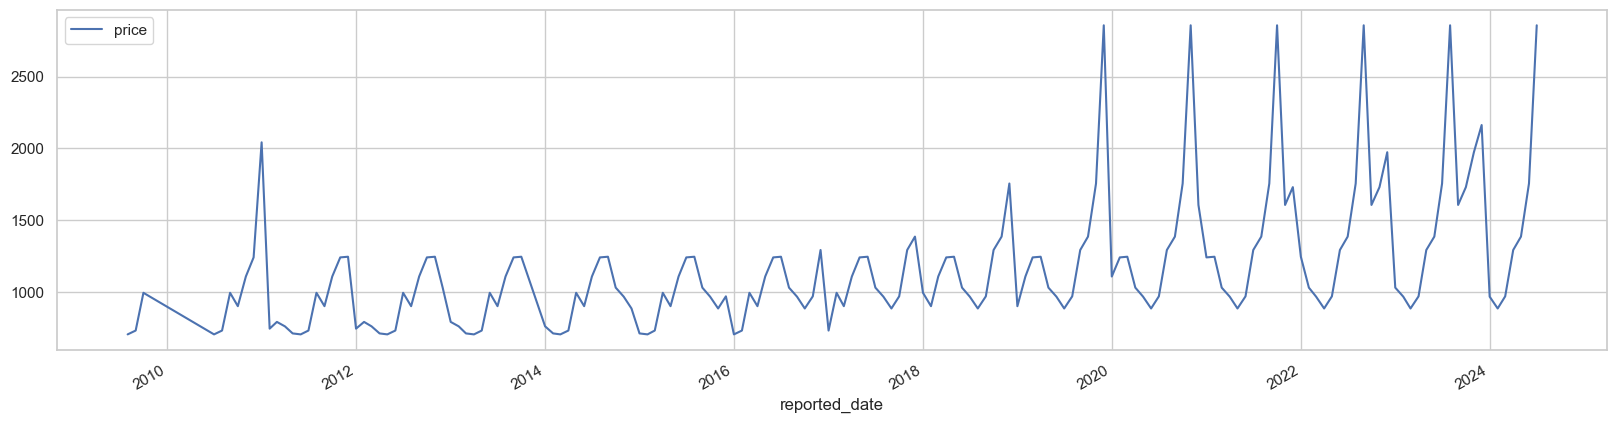

In [44]:
plt.figure(figsize = (20, 5))
df_local_min.plot()
plt.show()